# Jacob Mendoza 

## Exploratory Data Analysis on UFC Fight Data from 2010 - 2021

In this project, I will be analyzing UFC fight data from the years 2010 - 2021. The dataset consists of every UFC fight during this time period. It consists of both fighters names and whether they were in the red corner or the blue corner for the specific fight. There is also statistics on the fight such as the odds, date, and location. There is also statistics for each fighter such as record, height and weight. 

Fighting is a very unpredictable sport and there are a lot of variables that come into effect. I want to analyze some of these varliables as well as take a look at the growth of the sport in the past decade. 

I will begin my analysis by looking into a topic that has been popular in the past few years. This has to do with the trend of wrestlers and grapplers notibly holding the majority of the championship belt. I wanted to dig deeper into the individual match ups to further explore the theory that grappling is the best base for martial arts. 

Then I will extend my analysis to analyze another theory that has been talked about in combat sports for a while. Are southpaw fighters more successful than orthodox fighters. Even though orthodox fighters are more common, it has been said that southpaws have a higher win percentage. 

Finally, I analyze the growth in the number of fights in the UFC for both male and female bouts. 

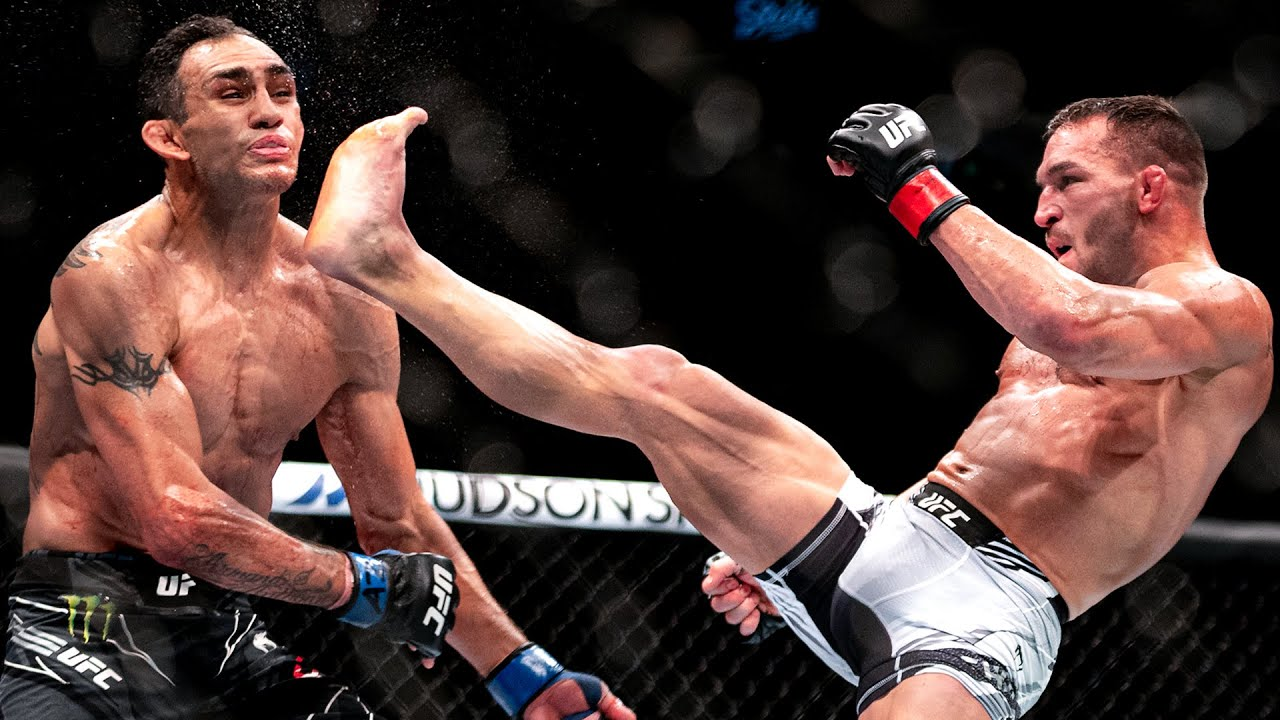


In [1]:
#importing libraries 
import pandas as pd
import numpy as np

In [2]:
ufc_data = pd.read_csv('ufc-master.csv')
print('The shape of this dataset is', ufc_data.shape)
print('Each fight is held in a row and each column consist of data on the fight and fighters themselves', ufc_data.columns)

#Since this is a large dataset and each fight has different variables based on fighter statistics, there is a lot of null values
#I will get rid of the null values by replacing them with zeros 

ufc_data.fillna(0)

#To further clean the data, I will get rid of some of the columns that will not be relevent for our analysis
ufc_data.columns.get_loc('better_rank')
ufc_data.drop(ufc_data.iloc[:, 107:120], inplace = True, axis = 1)

#display updated dataframe
ufc_data.head()

The shape of this dataset is (4896, 119)
Each fight is held in a row and each column consist of data on the fight and fighters themselves Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'date',
       'location', 'country', 'Winner',
       ...
       'finish_details', 'finish_round', 'finish_round_time',
       'total_fight_time_secs', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds',
       'b_sub_odds', 'r_ko_odds', 'b_ko_odds'],
      dtype='object', length=119)


,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Joe Solecki,Jared Gordon,-135.0,115,74.074074,115.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Question 1: When looking at fighting styles, do grapplers have the advantage?

At the moment, wrestlers have the spotlight and reputation for having a superior fighting style compared to others. What seperated them in these controlled fights is the scoring system. It is known that a takedown plus control time on your opponent weighs heavily on the judges scoring criteria. This gives wrestlers the uperhand when they are able to successfully take their opponent down and control them on the ground. I will examine this further by analyzing how wrestling based fighters match up with strikers. I will do this by analyzing the 'avg_TD' coulumn for each fighter. I am going to consider fighters who average at least one takedown per fight as a wrestling based fighter, and those who average less than a half of a takedown in each fight as a striker. Reducing the dataset to the matchups where one fighter can be considered a grappler, and one can be considered a striker, I will be able to analyze who wins more when faced head to head. 

In [3]:
#I will start by creating two lists of fights who included a grappling heavy fighter with an oppenent who could be considered a striker

blue_grappler = []
red_grappler = []

for fight, stats in ufc_data.iterrows(): 
    if stats['B_avg_TD_landed'] >= 1:
        if stats['R_avg_TD_landed'] <= .5:
            blue_grappler.append(fight)
    elif stats['R_avg_TD_landed'] >= 1:
        if stats['B_avg_TD_landed'] <= .5: 
            red_grappler.append(fight)

blue = ufc_data.iloc[blue_grappler]
red = ufc_data.iloc[red_grappler]

#The blue data frame consists of fights where the blue fighter is the grappler 
#The red data frame consists of fights where the red fighter is the grappler 

In matchups between grapplers and strikers, grapplers won 724 times. While strikers won 554 times.
 


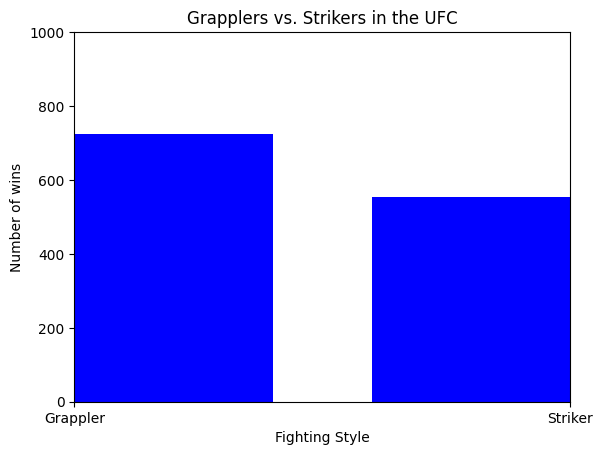

In [4]:
grappler = 0 
grappler_list = []
striker = 0 
striker_list = []


#Looking over the blue grappler data frame to compare grappler wins to striker wins 
for fight, stats in blue.iterrows(): 
    if stats['Winner'] == 'Blue': 
        grappler += 1
        grappler_list.append(fight)
    elif stats['Winner'] == 'Red': 
        striker += 1
        striker_list.append(fight)

#Looking over the red grappler data frame to compare grappler wins to striker wins
for fight, stats in red.iterrows(): 
    if stats['Winner'] == 'Red': 
        grappler += 1
        grappler_list.append(fight)
    elif stats['Winner'] == 'Blue': 
        striker += 1
        striker_list.append(fight)

print('In matchups between grapplers and strikers, grapplers won', grappler , 'times. While strikers won', striker, 'times.')
print(' ')

import matplotlib.pyplot as plt
import seaborn as sn
colors = ["Grappler","Striker"]
stats = [grappler, striker]
plt.bar(colors,stats,label='Grappler',color ="r")
plt.bar(colors,stats,label='Striker',color="b")
plt.plot()
plt.xlabel('Fighting Style')
plt.ylabel('Number of wins')
plt.title('Grapplers vs. Strikers in the UFC')
plt.axis(["Grappler", "Striker", 0, 1000])
plt.show()

# Question 2: How does stance affect win percentage? 
In combat sports, southpaw fighters are known to have an advantage in striking. I wanted to analyze this within martial arts with the added variables of other combat sports involved in the fight. I will explore this by iterating through each fight and counting the amount of fights southpaw fighters win and the amount of fights orthodox fighters win. Then I will run through the dataset to count the total amount of fights each stance had. Since southpaws are not as common, I use the two totals to calculate the total percentages within the dataset in order to account for the skew of orthodox fighters.

In [5]:
#Since southpaw fighters are not as frequent in the data set, I am going to have to use win percentage
#First I will calculate the amount of wins each has, then I will calculate the amount of fights they have to get the win ratio

southpaw_wins = 0
ortho_wins = 0

for fight, stats in ufc_data.iterrows(): 
    if stats['R_Stance'] == 'Orthodox' and stats['Winner'] == 'Red': 
        ortho_wins += 1
    if stats['B_Stance'] == 'Orthodox' and stats['Winner'] == 'Blue': 
        ortho_wins += 1
    if stats['R_Stance'] == 'Southpaw' and stats['Winner'] == 'Red': 
        southpaw_wins += 1
    if stats['B_Stance'] == 'Southpaw' and stats['Winner'] == 'Blue': 
        southpaw_wins += 1

#Total fights 
southpaw_fights = 0 
ortho_fights = 0

for fight, stats in ufc_data.iterrows(): 
    if stats['R_Stance'] == 'Orthodox' or stats['B_Stance'] == 'Orthodox': 
        ortho_fights += 1
    if stats['R_Stance'] == 'Southpaw' or stats['B_Stance'] == 'Southpaw': 
        southpaw_fights += 1

southpaw_win_percentage = (southpaw_wins / southpaw_fights) * 100 
ortho_win_percentage = (ortho_wins / ortho_fights) * 100 


print('The win percentage of Southpaw fighters is: ', southpaw_win_percentage)
print('The win percentage of Orthodox fighters is: ', ortho_win_percentage)

The win percentage of Southpaw fighters is:  57.28929384965832
The win percentage of Orthodox fighters is:  80.21857923497268


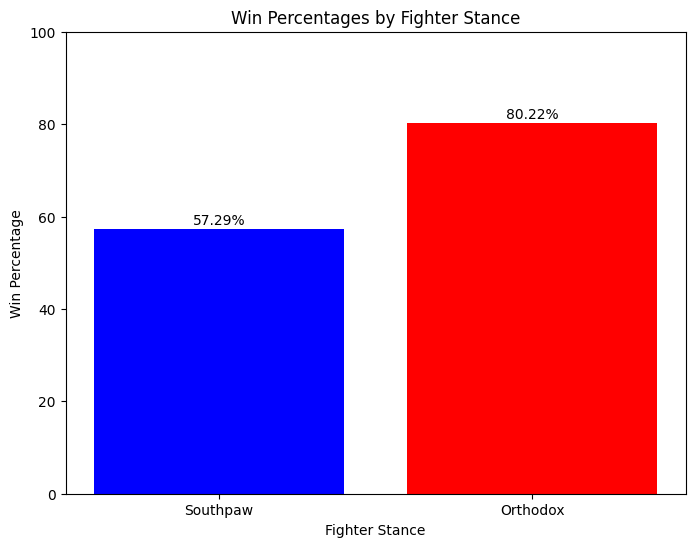

In [6]:
data = {'Stance': ['Southpaw', 'Orthodox'], 'Win Percentage': [southpaw_win_percentage, ortho_win_percentage]}
df = pd.DataFrame(data)

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(df['Stance'], df['Win Percentage'], color=['blue', 'red'])
plt.xlabel('Fighter Stance')
plt.ylabel('Win Percentage')
plt.title('Win Percentages by Fighter Stance')
for i, value in enumerate(df['Win Percentage']):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center')
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100 for percentages
plt.show()

# A look into the evolution of the UFC

With the impact of social media and combat sport exposure, I will explore the evolution of the UFC. I will do this by analyzing the growth in the amount of fights per year. I wanted to do this for both male and female fights, due to the recent growth in the womens divison. To do this, I create a column to account for the year the fights took place in, then I group the data by the year and count the values for female and male fights. Since this data is easily accessable and I wanted to look further in the growth post-covid, I added the 2022 and 2023 fight totals to this analysis. 

In [7]:
#First I am going to have to convernt the date column into datetime format
ufc_data['date'] = pd.to_datetime(ufc_data['date'], format = 'mixed')
ufc_data['Year'] = ufc_data['date'].dt.year

In [8]:
gender_counts_per_year = ufc_data.groupby('Year')['gender'].value_counts().unstack(fill_value=0)

# New data to be added from updated UFC website for years 2022 and 2023
new_data = {
    2022: {'FEMALE': 87, 'MALE': 426},
    2023: {'FEMALE': 94, 'MALE': 414}
}

# Adding or updating the new data
for year, counts in new_data.items():
    gender_counts_per_year.loc[year] = [counts['FEMALE'], counts['MALE']]

print(gender_counts_per_year) 

gender  FEMALE  MALE
Year                
2010         0   210
2011         0   295
2012         0   333
2013        15   361
2014        30   464
2015        44   420
2016        50   433
2017        60   380
2018        72   399
2019        91   416
2020        82   369
2021        68   304
2022        87   426
2023        94   414


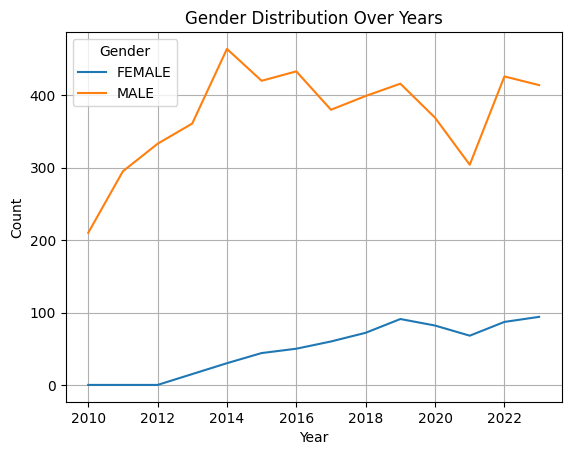

In [9]:
# Assuming your DataFrame from the groupby operation is named gender_counts_per_year
gender_counts_per_year.plot(kind='line')
plt.title('Gender Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Gender')
plt.show()

# How often does the red corner win

In [10]:
red = 0
blue = 0

for fight, stats in ufc_data.iterrows():
    if stats['Winner'] == 'Red':
        red += 1
    if stats['Winner'] == 'Blue':
        blue += 1

total = red + blue 

print(red)
print(blue)
print(red/total)

2859
2037
0.5839460784313726
